In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [3]:
autism_dataset = pd.read_csv('./data_csv.csv')

In [4]:
autism_dataset.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [5]:
autism_dataset.shape

(1985, 28)

In [6]:
autism_dataset.describe()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Childhood Autism Rating Scale
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1976.000000,1985.000000,1946.000000,1985.000000
mean,993.000000,0.299244,0.238287,0.213098,0.272040,0.278589,0.306297,0.345088,0.243829,0.259950,0.446348,3.074393,9.624685,4.234841,1.701763
std,573.164462,0.458042,0.426143,0.409600,0.445123,0.448418,0.461071,0.475517,0.429499,0.438717,0.497238,3.680263,4.302416,2.898247,1.015367
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,497.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,1.000000
50%,993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,4.000000,1.000000
75%,1489.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,14.000000,6.000000,2.000000
max,1985.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,18.000000,10.000000,4.000000


In [7]:
autism_dataset['ASD_traits'].value_counts()

ASD_traits
Yes    1074
No      911
Name: count, dtype: int64

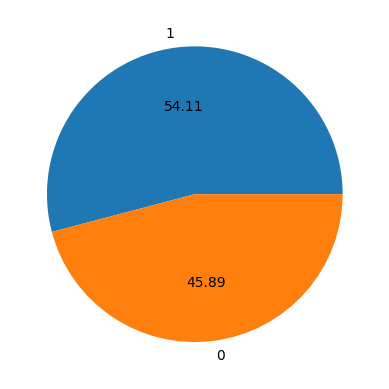

In [8]:
#1->autism
#0->no autism
import matplotlib.pyplot as plt
plt.pie(autism_dataset['ASD_traits'].value_counts(),labels=['1','0'],autopct="%0.2f")
plt.show()

In [9]:
X = autism_dataset.drop(columns=['ASD_traits', 'Ethnicity', 'Who_completed_the_test','Qchat_10_Score','Childhood Autism Rating Scale',"CASE_NO_PATIENT'S"], axis=1)
Y = autism_dataset['ASD_traits']

In [10]:
print(X)

      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  ...  \
0      0   0   0   0   0   0   1   1   0                             1  ...   
1      1   1   0   0   0   1   1   0   0                             0  ...   
2      1   0   0   0   0   0   1   1   0                             1  ...   
3      1   1   1   1   1   1   1   1   1                             1  ...   
4      1   1   0   1   1   1   1   1   1                             1  ...   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..                           ...  ...   
1980   0   0   0   0   0   0   0   0   0                             1  ...   
1981   0   0   0   0   0   0   0   0   0                             0  ...   
1982   0   0   0   0   0   0   0   0   0                             1  ...   
1983   0   0   0   0   0   0   0   0   0                             0  ...   
1984   0   0   0   0   0   0   0   0   0                             1  ...   

      Speech Delay/Language Disorder  Learning diso

In [11]:
print(Y)

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1980     No
1981     No
1982    Yes
1983     No
1984    Yes
Name: ASD_traits, Length: 1985, dtype: object


In [12]:
autism_dataset.isnull().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [13]:
  #Data standardization   

In [18]:
from sklearn.impute import SimpleImputer
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
# Preprocessing for numerical data, including imputation
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data, including imputation
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a preprocessing and classification pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC())])

In [19]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                   

In [20]:
#Train and test data

In [21]:
#Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [22]:
print(X.shape)

(1985, 22)


In [23]:
print(X_train.shape)

(1488, 22)


In [24]:
print(X_test.shape)

(497, 22)


In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Anxiety_disorder', 'Sex', 'Jaundice',
       'Family_mem_with_ASD'],
      dtype='object'))])),
                ('classifier', SVC())])

In [33]:
predictions = model.predict(X_test)

In [34]:
# accuracy score on the training data

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8913480885311871


In [37]:
import pickle